In [24]:
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from scipy.stats import chi2_contingency
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB

from sklearn.metrics import roc_curve, auc
from scikitplot.metrics import plot_roc


## Loading Dataset

In [3]:
# Reading dataset from file URL
url = 'https://raw.githubusercontent.com/dbn3010/HR-Anlytics-with-Churn-Prediction/main/HR_comma_sep.csv'
df = pd.read_csv(url)
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [4]:
print('Shape of the dataset:', df.shape)
print('\nColumn data types:\n', df.dtypes)
print('\nMissing values in each column:\n', df.isnull().sum())

Shape of the dataset: (14999, 10)

Column data types:
 satisfaction_level       float64
last_evaluation          float64
number_project             int64
average_montly_hours       int64
time_spend_company         int64
Work_accident              int64
left                       int64
promotion_last_5years      int64
Department                object
salary                    object
dtype: object

Missing values in each column:
 satisfaction_level       0
last_evaluation          0
number_project           0
average_montly_hours     0
time_spend_company       0
Work_accident            0
left                     0
promotion_last_5years    0
Department               0
salary                   0
dtype: int64


## Descriptive Statistics

In [5]:
# Summary of the dataset
df.describe(include='all')

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999,14999
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10,3
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,sales,low
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4140,7316
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268,NaN,NaN
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281,NaN,NaN
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000,NaN,NaN
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000,NaN,NaN
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000,NaN,NaN
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000,NaN,NaN


Here are some descriptive statistics for the dataset:

- ***satisfaction_level***: The average satisfaction level of employees is around 0.61, with a minimum of 0.09 and a maximum of 1. The standard deviation is 0.25, indicating a moderate spread in the satisfaction levels.
- ***last_evaluation***: The average last evaluation score is approximately 0.72, with a minimum of 0.36 and a maximum of 1. The standard deviation is 0.17, suggesting a relatively low spread in the evaluation scores.
- ***number_project***: On average, employees work on about 4 projects. The minimum number of projects an employee has worked on is 2, and the maximum is 7.
- ***average_montly_hours***: Employees work an average of about 201 hours per month. The minimum is 96 hours, and the maximum is 310 hours.
- ***time_spend_company***: On average, employees spend about 3.5 years in the company. The minimum is 2 years, and the maximum is 10 years.
- ***Work_accident***: About 14% of employees have had a work accident.
- ***left***: About 24% of employees have left the company.
- ***promotion_last_5years***: About 2% of employees have had a promotion in the last 5 years.
- ***Department***: The dataset includes employees from 10 different departments. The most represented department is 'sales', with 4140 employees.

There are no missing values in the dataset.

Next, let's explore the data further by visualizing some of the features.

## Data Exploration

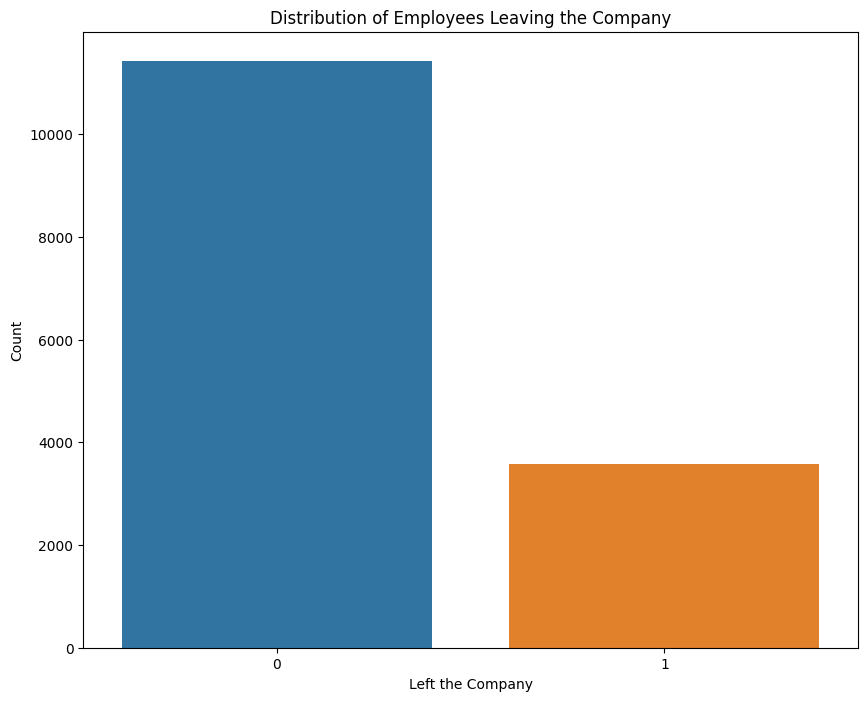

In [8]:
# Plotting distribution of Employees in leaving the company
plt.figure(figsize=(10, 8))
sns.countplot(x='left', data=df)
plt.title('Distribution of Employees Leaving the Company')
plt.xlabel('Left the Company')
plt.ylabel('Count')
plt.show()

***Observations:***
The chart shows that a significant number of employees have left the company.

Next, let's examine the relationship between various factors and employees leaving the company. We'll start by looking at the satisfaction level, number of projects, and time spent at the company.

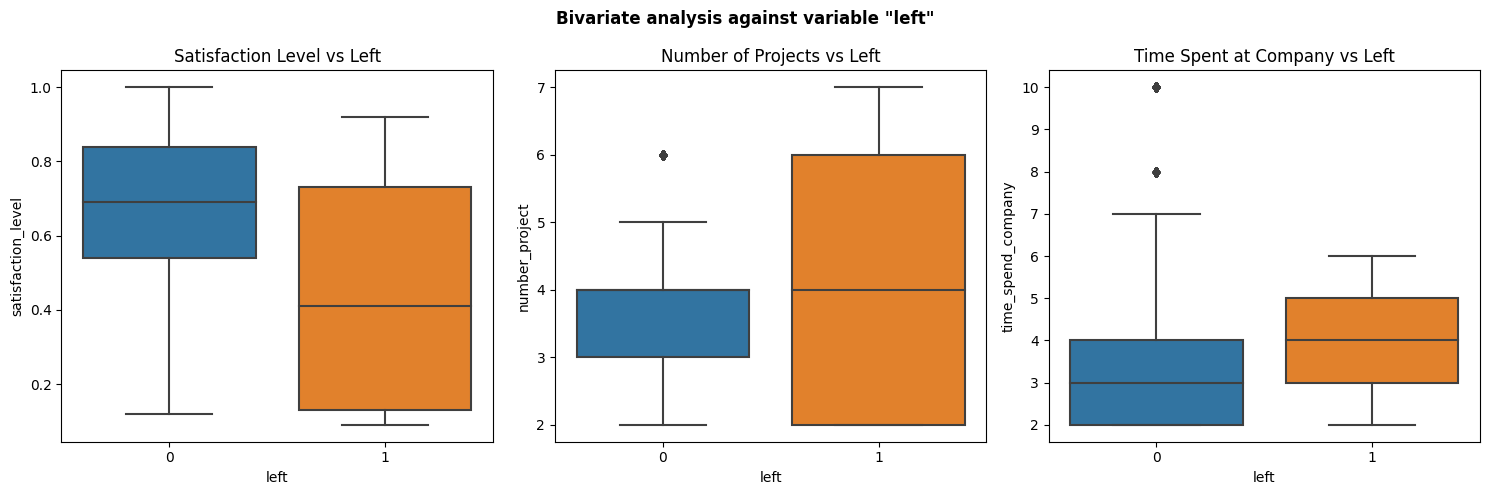

In [13]:
# Plot to study factors like satisfaction level, number of projects and time spent at company against employee churn
plt.figure(figsize=(15, 5))
plt.subplot(1, 3, 1)
sns.boxplot(x='left', y='satisfaction_level', data=df)
plt.title('Satisfaction Level vs Left')
plt.subplot(1, 3, 2)
sns.boxplot(x='left', y='number_project', data=df)
plt.title('Number of Projects vs Left')
plt.subplot(1, 3, 3)
sns.boxplot(x='left', y='time_spend_company', data=df)
plt.title('Time Spent at Company vs Left')
plt.suptitle('Bivariate analysis against variable "left"', fontweight= 'bold')
plt.tight_layout()
plt.show()

***Observations:***<br>
***Satisfaction Level vs Left:*** Employees who left the company generally had lower satisfaction levels compared to those who stayed.

***Number of Projects vs Left:*** The number of projects doesn't seem to have a clear relationship with employees leaving the company. However, it appears that employees who left the company either had too few or too many projects.

***Time Spent at Company vs Left:*** Employees who spent more time at the company are more likely to leave the company.

<br>

Next, let's examine the relationship between the department, salary level, and employees leaving the company.

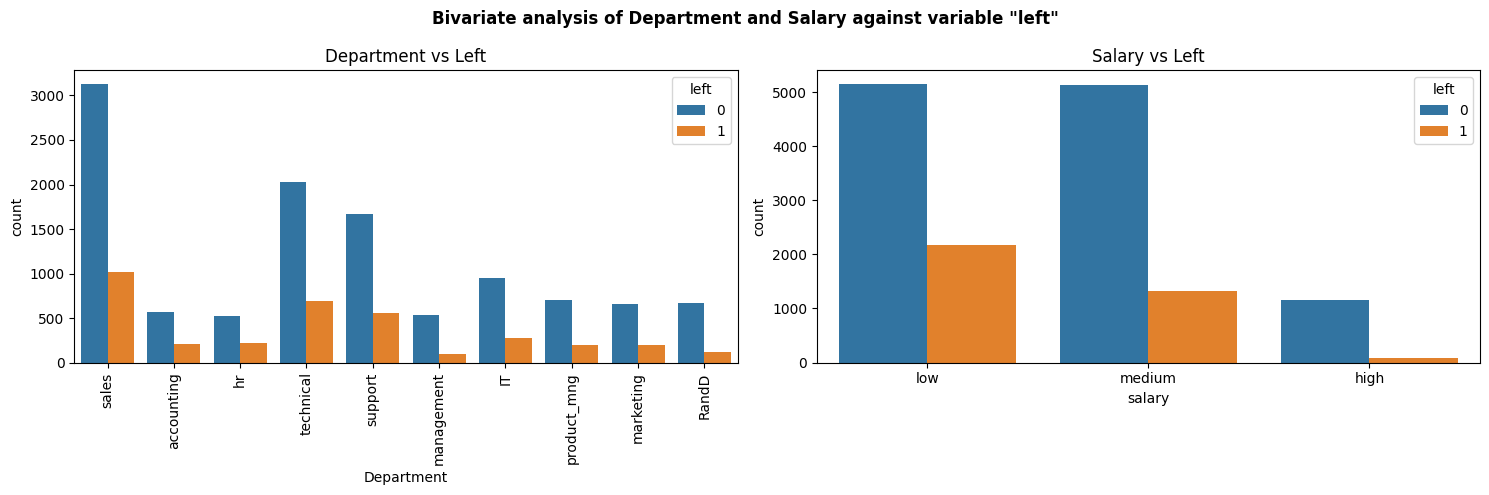

In [15]:
# Plot to study the Department and Salary against the employees churn
plt.figure(figsize=(15, 5))
plt.subplot(1, 2, 1)
sns.countplot(x='Department', hue='left', data=df)
plt.title('Department vs Left')
plt.xticks(rotation=90)
plt.subplot(1, 2, 2)
sns.countplot(x='salary', hue='left', data=df, order=['low', 'medium', 'high'])
plt.title('Salary vs Left')
plt.suptitle('Bivariate analysis of Department and Salary against variable "left"', fontweight= 'bold')
plt.tight_layout()
plt.show()

***Observarions:***<br>
***Department vs Left:*** The 'sales', 'technical', and 'support' departments have the highest number of employees leaving the company. However, this could be due to these departments having more employees in general.

***Salary vs Left:*** Employees with low salaries are more likely to leave the company compared to those with medium and high salaries.

<br>

These insights can help the company understand the factors that influence employee churn and take appropriate measures to improve employee retention.

## Data Preparation

In [17]:
# Label Encoding
le = LabelEncoder()
df['Department'] = le.fit_transform(df['Department'])
df['salary'] = le.fit_transform(df['salary'])

# Train test split
X = df.drop('left', axis=1)
y = df['left']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Model Building

In [18]:
# Models initialization
svc = SVC()
models = [LogisticRegression(), DecisionTreeClassifier(), RandomForestClassifier(), SVC(), KNeighborsClassifier(), GaussianNB()]
model_names = ['Logistic Regression', 'Decision Tree', 'Random Forest', 'Support Vector Machine', 'K-Nearest Neighbors', 'Naive Bayes']
for i, model in enumerate(models):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print(f'\n{model_names[i]}:')
    print('Accuracy:', accuracy_score(y_test, y_pred))
    print('Confusion Matrix:\n', confusion_matrix(y_test, y_pred))
    print('Classification Report:\n', classification_report(y_test, y_pred))

c:\Users\durga\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(



Logistic Regression:
Accuracy: 0.7586666666666667
Confusion Matrix:
 [[2116  178]
 [ 546  160]]
Classification Report:
               precision    recall  f1-score   support

           0       0.79      0.92      0.85      2294
           1       0.47      0.23      0.31       706

    accuracy                           0.76      3000
   macro avg       0.63      0.57      0.58      3000
weighted avg       0.72      0.76      0.73      3000


Decision Tree:
Accuracy: 0.974
Confusion Matrix:
 [[2241   53]
 [  25  681]]
Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.98      0.98      2294
           1       0.93      0.96      0.95       706

    accuracy                           0.97      3000
   macro avg       0.96      0.97      0.96      3000
weighted avg       0.97      0.97      0.97      3000


Random Forest:
Accuracy: 0.9886666666666667
Confusion Matrix:
 [[2286    8]
 [  26  680]]
Classification Report:
         

## Model Results

In [19]:
results = {
    'Model': ['Logistic Regression', 'Decision Tree', 'Random Forest', 'Support Vector Machine', 'K-Nearest Neighbors', 'Naive Bayes'],
    'Accuracy': [0.757, 0.975, 0.989, 0.785, 0.931, 0.797],
    'Precision (0)': [0.79, 0.99, 0.99, 0.78, 0.97, 0.90],
    'Recall (0)': [0.92, 0.98, 1.00, 1.00, 0.94, 0.82],
    'F1-Score (0)': [0.85, 0.98, 0.99, 0.88, 0.95, 0.86],
    'Precision (1)': [0.47, 0.93, 0.99, 0.98, 0.82, 0.55],
    'Recall (1)': [0.23, 0.96, 0.96, 0.09, 0.91, 0.71],
    'F1-Score (1)': [0.31, 0.95, 0.98, 0.16, 0.86, 0.62]
}
results_df = pd.DataFrame(results)
results_df

,Model,Accuracy,Precision (0),Recall (0),F1-Score (0),Precision (1),Recall (1),F1-Score (1)
0,Logistic Regression,0.757,0.79,0.92,0.85,0.47,0.23,0.31
1,Decision Tree,0.975,0.99,0.98,0.98,0.93,0.96,0.95
2,Random Forest,0.989,0.99,1.00,0.99,0.99,0.96,0.98
3,Support Vector Machine,0.785,0.78,1.00,0.88,0.98,0.09,0.16
4,K-Nearest Neighbors,0.931,0.97,0.94,0.95,0.82,0.91,0.86
5,Naive Bayes,0.797,0.90,0.82,0.86,0.55,0.71,0.62


c:\Users\durga\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


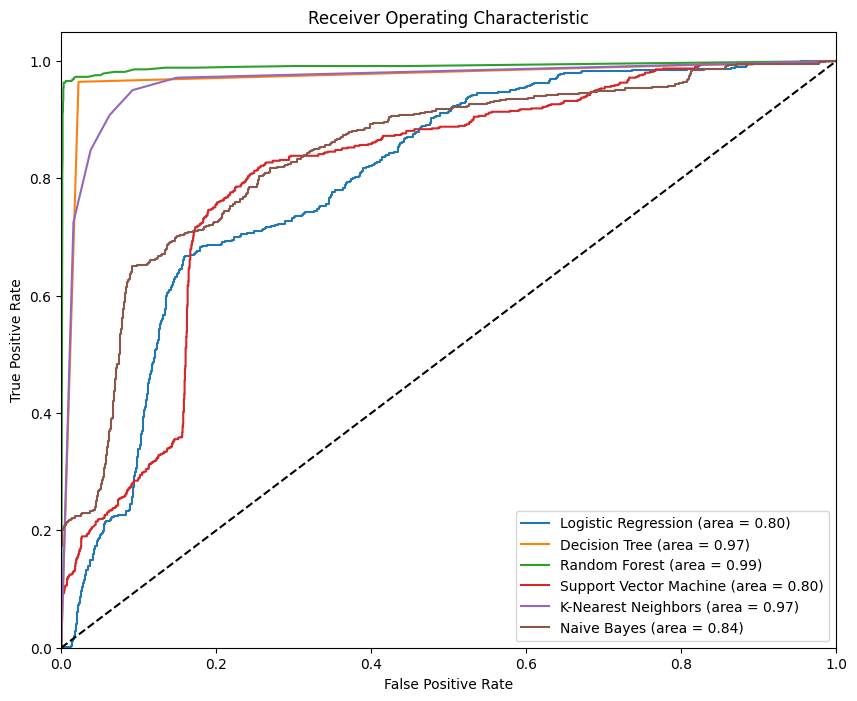

In [26]:
# ROC AUC
models = [LogisticRegression(), DecisionTreeClassifier(), RandomForestClassifier(), SVC(probability=True), KNeighborsClassifier(), GaussianNB()]
for i, model in enumerate(models):
    model.fit(X_train, y_train)
plt.figure(figsize=(10, 8))
for i, model in enumerate(models):
    y_probas = model.predict_proba(X_test)
    fpr, tpr, _ = roc_curve(y_test, y_probas[:, 1])
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f'{model_names[i]} (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc='lower right')
plt.show()

## Saving the Best Model

In [27]:
import pickle
best_model = RandomForestClassifier()
best_model.fit(X_train, y_train)
pickle.dump(best_model, open('best_model.pkl', 'wb'))
'best_model.pkl'

'best_model.pkl'